In [1]:
!pip install numpy matplotlib gensim
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-03-19 07:09:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-19 07:09:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-19 07:09:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [4]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [5]:
glove_input_file='glove.6B.50d.txt'
word2vec_output_file='glove.6B.50d.word2vec'
glove2word2vec(glove_input_file,word2vec_output_file)

model=KeyedVectors.load_word2vec_format(word2vec_output_file,binary=False)

<ipython-input-5-b07c0618d68b>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file,word2vec_output_file)


In [9]:
print(model.most_similar(positive=['man','queen'], negative=['woman'], topn=5))

[('king', 0.8612024784088135), ('prince', 0.8110411167144775), ('crown', 0.7789078950881958), ('royal', 0.7496289610862732), ('knight', 0.7449893951416016)]


In [13]:
print(model.most_similar(positive=['cricket','player'], negative=['bowler'], topn=5))

[('football', 0.8695788383483887), ('soccer', 0.8251979947090149), ('club', 0.8047658801078796), ('team', 0.7867863178253174), ('league', 0.7853158712387085)]


In [37]:
print(model.most_similar('gandhi', topn=5))

[('mahatma', 0.8813636898994446), ('indira', 0.8513151407241821), ('nehru', 0.7741664052009583), ('rajiv', 0.7726855278015137), ('jawaharlal', 0.7673238515853882)]


In [33]:
import numpy as np
words=['king','queen','man','woman','paris','berlin','france','germany']
word_vectors=np.array([model[w] for w in words])


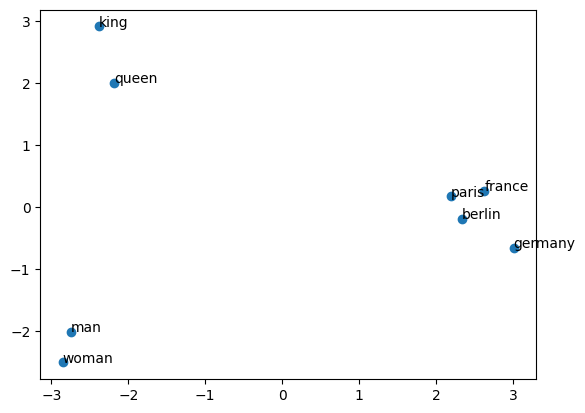

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2)
result=pca.fit_transform(word_vectors)

plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
  plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [38]:
!pip install gensim
!pip install tqdm

In [39]:
import gensim.downloader as api
from gensim.models import Word2Vec
from tqdm import tqdm

In [40]:
corpus=api.load('text8')
corpus_with_progress=tqdm(corpus)

[==================================================] 100.0% 31.6/31.6MB downloaded


0it [00:00, ?it/s]

In [43]:
vector_size=50
window=3
min_count=5
epochs=3

In [44]:
cbow_model=Word2Vec(corpus_with_progress, vector_size=50,window=3,min_count=5,workers=4,sg=0,epochs=3)

1701it [04:30,  6.28it/s] 


In [45]:
skipgram_model=Word2Vec(corpus_with_progress, vector_size=50,window=3,min_count=5,workers=4,sg=1,epochs=3)

In [46]:
words=['king','computer','city']
for word in words:
  print(f"Most similar to {word} in CBOW:")
  print(cbow_model.wv.most_similar(word,topn=3))
  print(f"Most similar to {word} in Skip gram:")
  print(skipgram_model.wv.most_similar(word,topn=3))
  print("\n")

Most similar to king in CBOW:
[('prince', 0.8215615153312683), ('emperor', 0.8179366588592529), ('constantine', 0.8104957342147827)]
Most similar to king in Skip gram:
[('queen', 0.8536869287490845), ('consort', 0.841634213924408), ('prince', 0.8415598273277283)]


Most similar to computer in CBOW:
[('digital', 0.8165566325187683), ('software', 0.7918696999549866), ('computers', 0.7527157068252563)]
Most similar to computer in Skip gram:
[('programmable', 0.8201444745063782), ('laptop', 0.8111027479171753), ('computers', 0.8102041482925415)]


Most similar to city in CBOW:
[('town', 0.8879613280296326), ('area', 0.8100683689117432), ('village', 0.7832719683647156)]
Most similar to city in Skip gram:
[('town', 0.9170953631401062), ('auckland', 0.8375844359397888), ('metropolitan', 0.8328904509544373)]


